<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━╸━━━━━━━━━━━━━━━╸━━━━━   0.0 B /  ??.?MB @ 

In [46]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [79]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [80]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-06-14']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [49]:
tesla = yf.Ticker("TSLA")


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [50]:
tesla_data = tesla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [51]:
tesla_data.reset_index(inplace=True)

# Display the first five rows of the tesla_stock_data DataFrame
print(tesla_data.head())


        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [52]:

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Extract the text content of the response
html_data = response.text


Parse the html data using `beautiful_soup`.


In [53]:
soup = BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [54]:

# Use the read_html function to extract tables from HTML
tables = pd.read_html(html_data)

# Assuming the table of interest is the first table on the page
tesla_revenue = tables[1]

# Display the DataFrame
print(tesla_revenue.head())


  Tesla Quarterly Revenue(Millions of US $)  \
0                                2022-09-30   
1                                2022-06-30   
2                                2022-03-31   
3                                2021-12-31   
4                                2021-09-30   

  Tesla Quarterly Revenue(Millions of US $).1  
0                                     $21,454  
1                                     $16,934  
2                                     $18,756  
3                                     $17,719  
4                                     $13,757  


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [55]:
tesla_revenue["Tesla Quarterly Revenue(Millions of US $)"] = tesla_revenue["Tesla Quarterly Revenue(Millions of US $)"].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [56]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Tesla Quarterly Revenue(Millions of US $)'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [76]:
print(tesla_revenue.tail())
print(tesla_revenue.columns)


   Tesla Quarterly Revenue(Millions of US $)  \
48                                2010-09-30   
49                                2010-06-30   
50                                2010-03-31   
52                                2009-09-30   
53                                2009-06-30   

   Tesla Quarterly Revenue(Millions of US $).1  
48                                         $31  
49                                         $28  
50                                         $21  
52                                         $46  
53                                         $27  
Index(['Tesla Quarterly Revenue(Millions of US $)', 'Tesla Quarterly Revenue(Millions of US $).1'], dtype='object')


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [58]:
gme_ticker = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [59]:
gme_data = gme_ticker.history(period="max")


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [60]:
# Reset the index of gme_data DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data DataFrame
print(gme_data.head())


        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620129  1.693350  1.603296  1.691667  76216000        0.0   
1 2002-02-14  1.712707  1.716073  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683250  1.687458  1.658001  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578048  1.607504   7410400        0.0   
4 2002-02-20  1.615921  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [61]:
# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Extract the text content of the response
html_data = response.text

Parse the html data using `beautiful_soup`.


In [62]:
soup = BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [63]:
# Use the read_html function to extract tables from HTML
tables = pd.read_html(html_data)

# Extract the table with GameStop revenue (assuming it's the second table)
gme_revenue = tables[1]

#removing comma and dollar signs
gme_revenue["GameStop Quarterly Revenue(Millions of US $)"] = gme_revenue["GameStop Quarterly Revenue(Millions of US $)"].str.replace(',|\$',"")

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [64]:
print(gme_revenue.tail())

   GameStop Quarterly Revenue(Millions of US $)  \
57                                   2006-01-31   
58                                   2005-10-31   
59                                   2005-07-31   
60                                   2005-04-30   
61                                   2005-01-31   

   GameStop Quarterly Revenue(Millions of US $).1  
57                                         $1,667  
58                                           $534  
59                                           $416  
60                                           $475  
61                                           $709  


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



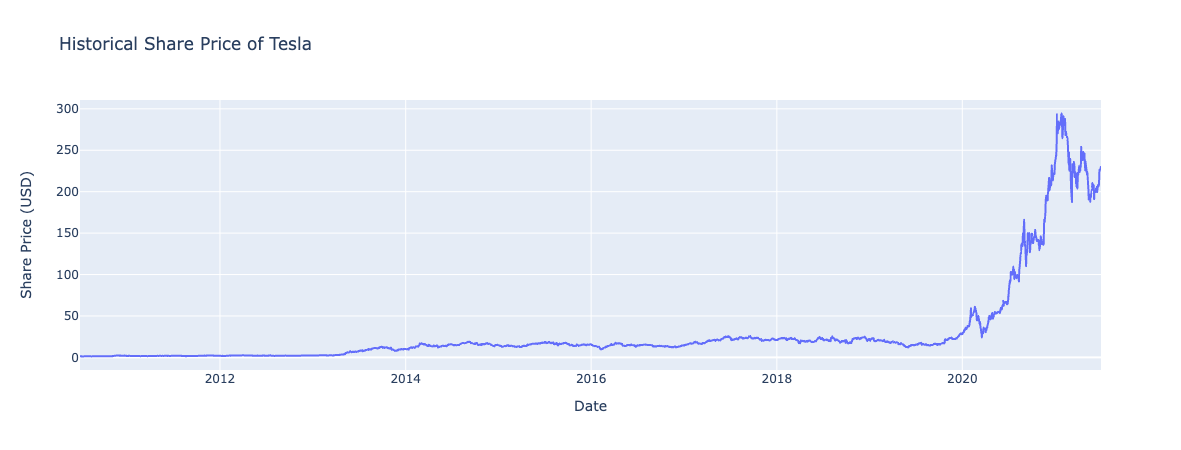

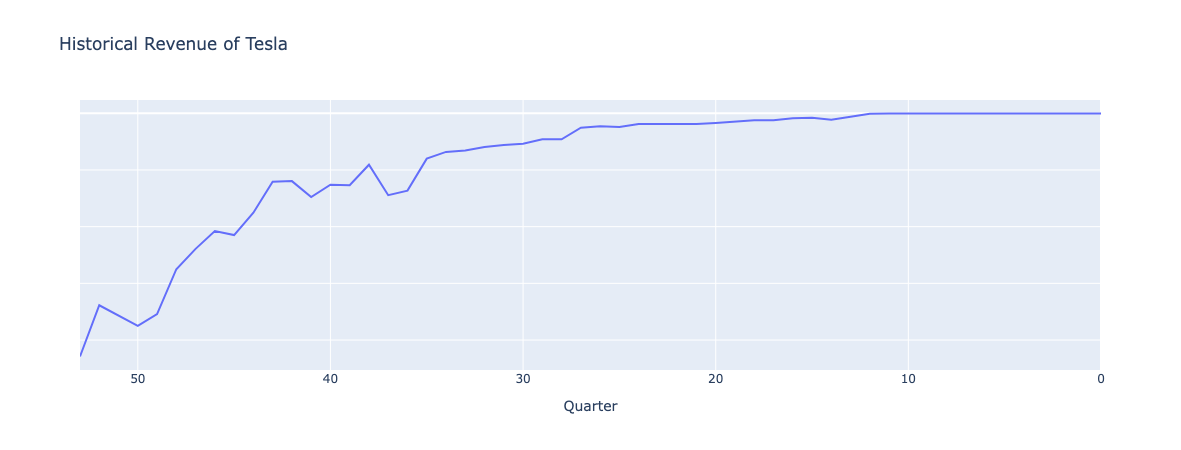

In [93]:
import plotly.express as px

# Assuming tesla_data contains the historical stock data for Tesla
# Filter the data to include only dates up to June 2021
tesla_data_filtered = tesla_data[tesla_data['Date'] <= '2021-06-30']

# Convert the 'Date' column to datetime format
tesla_data_filtered['Date'] = pd.to_datetime(tesla_data_filtered['Date'])

# Sort the data by date
tesla_data_filtered = tesla_data_filtered.sort_values('Date')

# Create a line plot
fig = px.line(tesla_data_filtered, x='Date', y='Close', title='Historical Share Price of Tesla',
              labels={'Date': 'Date', 'Close': 'Share Price (USD)'})

# Show the plot
fig.show()

import pandas as pd
import plotly.express as px

# Clean the revenue data by removing dollar signs and commas and converting to numeric format
tesla_revenue['Revenue'] = tesla_revenue['Tesla Quarterly Revenue(Millions of US $).1'].str.replace('$', '').str.replace(',', '').astype(float)

# Plot the revenue data with the index on the x-axis and revenue on the y-axis
fig = px.line(tesla_revenue, x=tesla_revenue.index[::-1], y='Revenue',
              title='Historical Revenue of Tesla',
              labels={'index': 'Quarter', 'Revenue': 'Revenue (USD Millions)'},
              orientation='v')
fig.update_xaxes(title='Quarter', autorange='reversed')
fig.update_yaxes(title='', autorange='reversed', showticklabels=False)
fig.show()


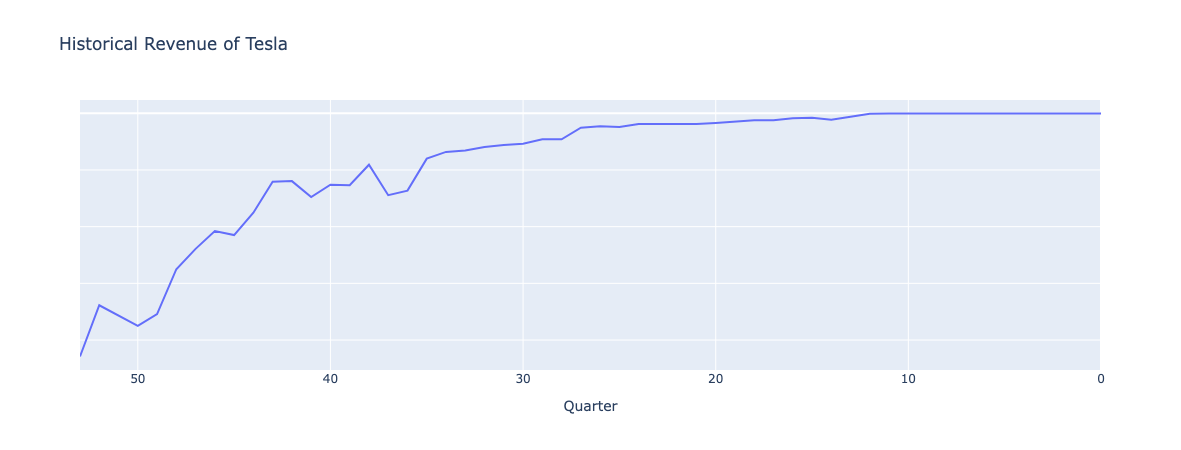

In [92]:
import pandas as pd
import plotly.express as px

# Clean the revenue data by removing dollar signs and commas and converting to numeric format
tesla_revenue['Revenue'] = tesla_revenue['Tesla Quarterly Revenue(Millions of US $).1'].str.replace('$', '').str.replace(',', '').astype(float)

# Plot the revenue data with the index on the x-axis and revenue on the y-axis
fig = px.line(tesla_revenue, x=tesla_revenue.index[::-1], y='Revenue',
              title='Historical Revenue of Tesla',
              labels={'index': 'Quarter', 'Revenue': 'Revenue (USD Millions)'},
              orientation='v')
fig.update_xaxes(title='Quarter', autorange='reversed')
fig.update_yaxes(title='', autorange='reversed', showticklabels=False)
fig.show()




## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


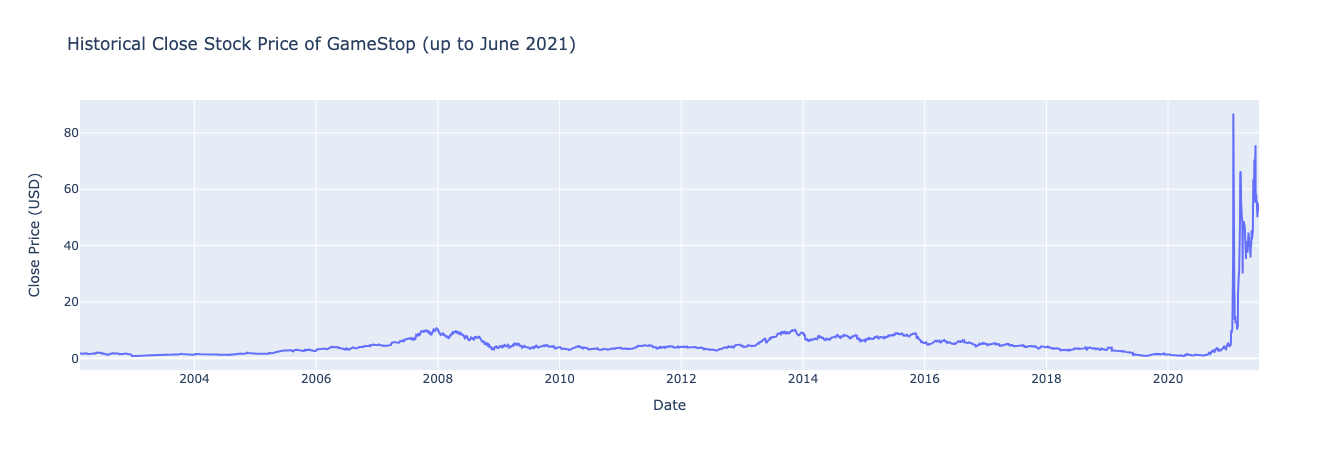

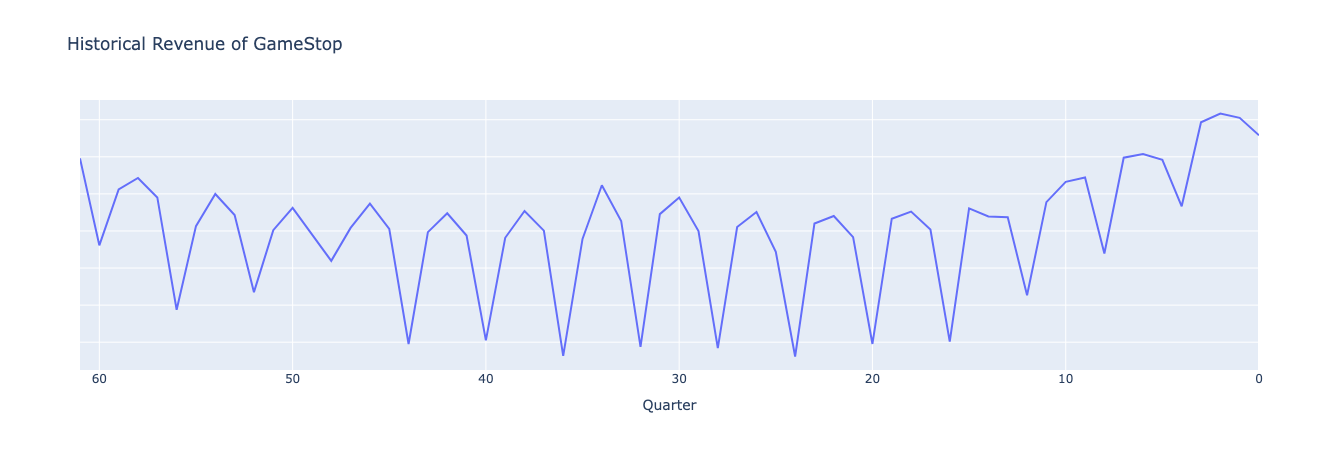

In [97]:
import plotly.graph_objects as go

# Filter GameStop data up to June 2021
gme_data_filtered = gme_data[gme_data['Date'] <= '2021-06-30']

# Create a line plot for GameStop stock price
fig = go.Figure(data=go.Scatter(x=gme_data_filtered['Date'], y=gme_data_filtered['Close'], mode='lines', name='Close Price'))
fig.update_layout(title='Historical Close Stock Price of GameStop (up to June 2021)',
                  xaxis_title='Date',
                  yaxis_title='Close Price (USD)')
fig.show()



import pandas as pd
import plotly.express as px

# Clean the revenue data by removing dollar signs and commas and converting to numeric format
gme_revenue['Revenue'] = gme_revenue['GameStop Quarterly Revenue(Millions of US $).1'].str.replace('$', '').str.replace(',', '').astype(float)

# Plot the revenue data with the index on the x-axis and revenue on the y-axis
fig = px.line(gme_revenue, x=gme_revenue.index[::-1], y='Revenue',
              title='Historical Revenue of GameStop',
              labels={'index': 'Quarter', 'Revenue': 'Revenue (USD Millions)'},
              orientation='v')
fig.update_xaxes(title='Quarter', autorange='reversed')
fig.update_yaxes(title='', autorange='reversed', showticklabels=False)
fig.show()


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
